# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [6]:
df.duplicated().sum()

np.int64(0)

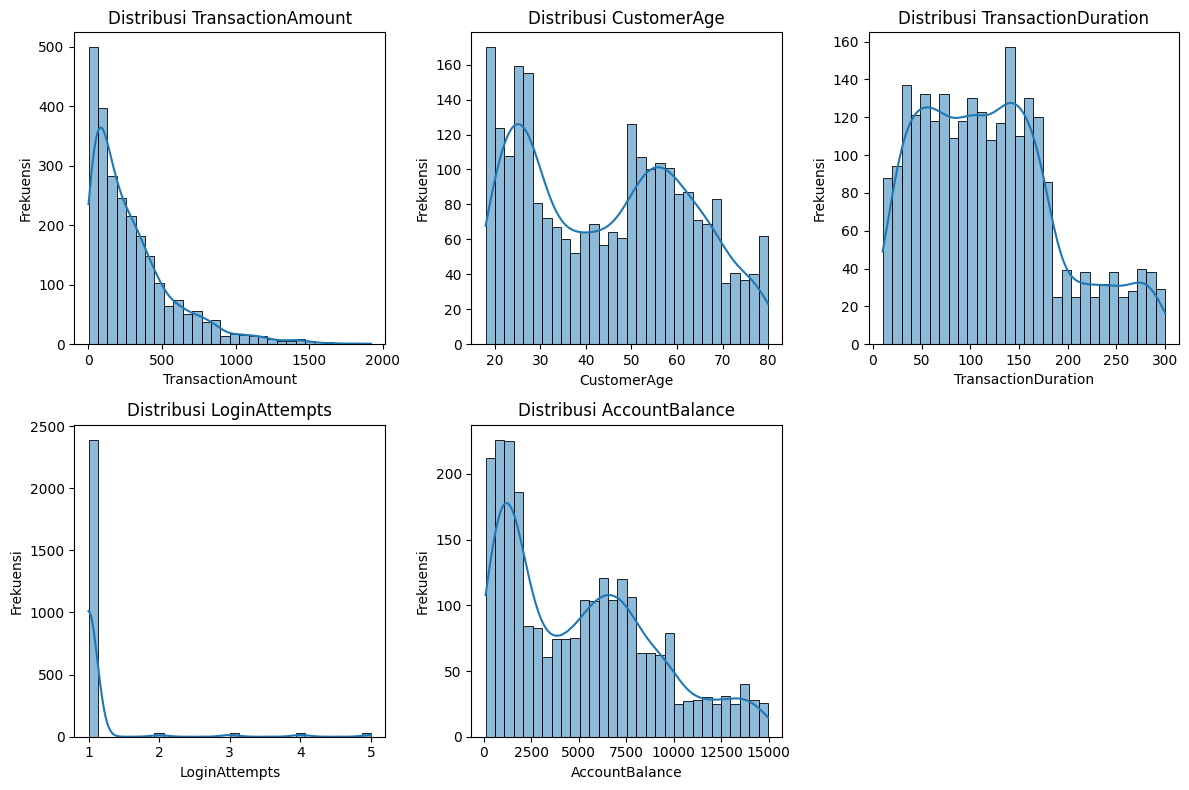

In [7]:
# Pilih kolom numerik yang ingin divisualisasikan
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Plot histogram
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

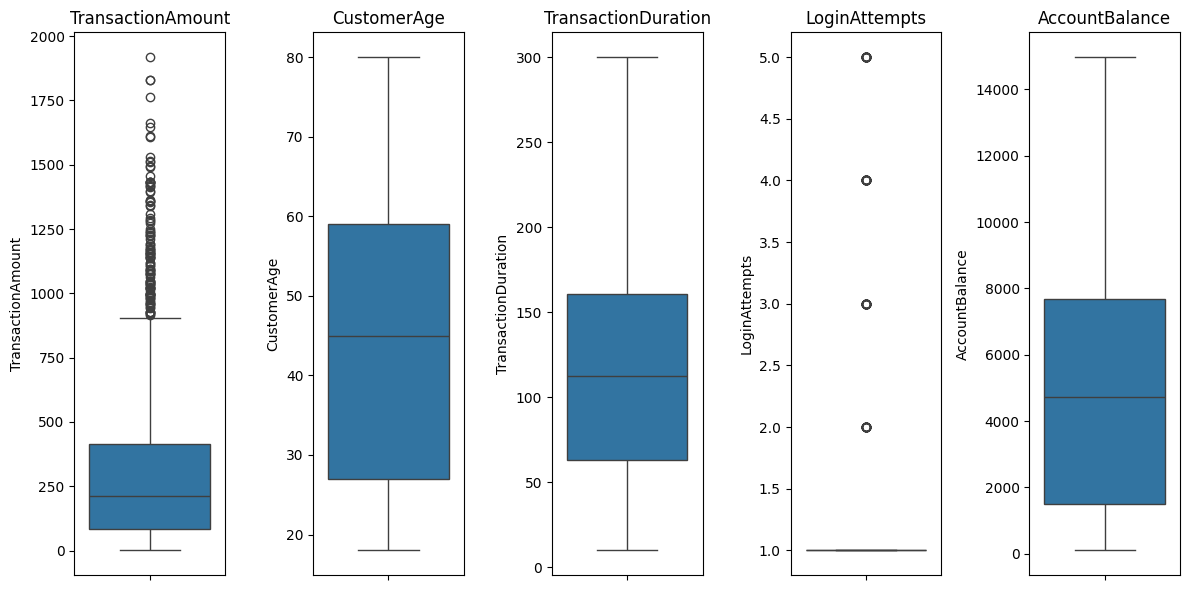

In [8]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

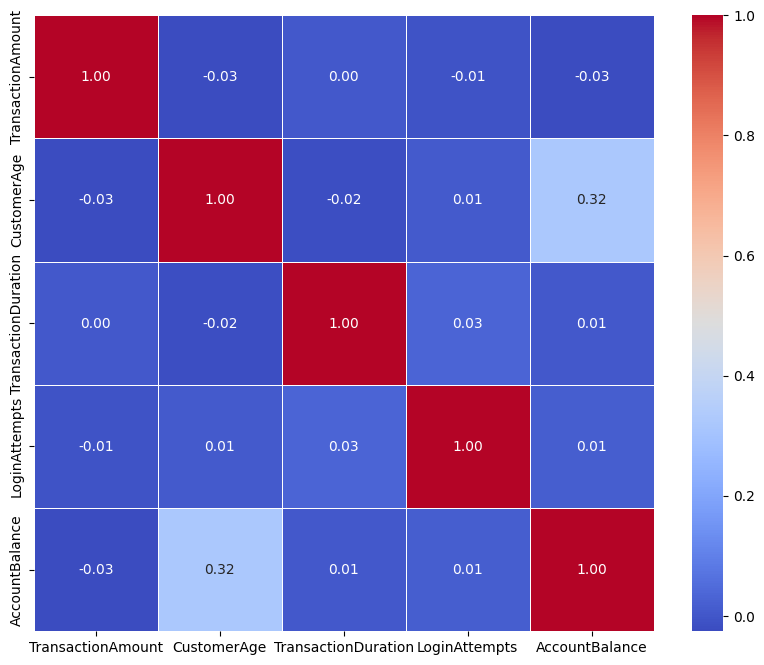

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Buat heatmap korelasi berdasarkan kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Drop kolom yang tidak digunakan
columns_to_drop = [
    'TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID',
    'IP Address', 'MerchantID', 'PreviousTransactionDate']
df = df.drop(columns=columns_to_drop)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom yang bertipe object
categorical_columns = df.select_dtypes(include=['object']).columns

# Dictionary untuk menyimpan encoder
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
df

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,0,70,0,81,1,5112.21
1,376.24,1,0,68,0,141,1,13758.91
2,126.29,1,2,19,3,56,1,1122.35
3,184.50,1,2,26,3,25,1,8569.06
4,13.45,0,2,26,3,198,1,7429.40
...,...,...,...,...,...,...,...,...
2507,856.21,0,1,33,0,109,1,12690.79
2508,251.54,1,1,48,0,177,1,254.75
2509,28.63,1,1,56,2,146,1,3382.91
2510,185.97,1,2,23,3,19,1,1776.91


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1.0,0.0,0.838710,0.0,0.244828,0.0,0.336832
1,0.195940,1.0,0.0,0.806452,0.0,0.451724,0.0,0.918055
2,0.065680,1.0,1.0,0.016129,1.0,0.158621,0.0,0.068637
3,0.096016,1.0,1.0,0.129032,1.0,0.051724,0.0,0.569198
4,0.006874,0.0,1.0,0.129032,1.0,0.648276,0.0,0.492591


In [14]:
import numpy as np

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df):
    outlier_indices = {}

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi indeks baris yang mengandung outlier
        outlier_rows = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_indices[column] = list(outlier_rows)

    return outlier_indices

# Mendeteksi outlier dalam data yang telah dinormalisasi
outliers = detect_outliers_iqr(df)

# Menampilkan jumlah outlier di setiap kolom
for col, idx in outliers.items():
    print(f"Kolom '{col}' memiliki {len(idx)} outlier.")

Kolom 'TransactionAmount' memiliki 113 outlier.
Kolom 'TransactionType' memiliki 568 outlier.
Kolom 'Channel' memiliki 0 outlier.
Kolom 'CustomerAge' memiliki 0 outlier.
Kolom 'CustomerOccupation' memiliki 0 outlier.
Kolom 'TransactionDuration' memiliki 0 outlier.
Kolom 'LoginAttempts' memiliki 122 outlier.
Kolom 'AccountBalance' memiliki 0 outlier.


In [15]:
df= df[~df.index.isin(sum(outliers.values(), []))]

In [16]:
df

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1.0,0.0,0.838710,0.000000,0.244828,0.0,0.336832
1,0.195940,1.0,0.0,0.806452,0.000000,0.451724,0.0,0.918055
2,0.065680,1.0,1.0,0.016129,1.000000,0.158621,0.0,0.068637
3,0.096016,1.0,1.0,0.129032,1.000000,0.051724,0.0,0.569198
5,0.047888,1.0,0.0,0.000000,1.000000,0.558621,0.0,0.045738
...,...,...,...,...,...,...,...,...
2505,0.300628,1.0,0.0,0.338710,0.333333,0.203448,0.0,0.347161
2506,0.047935,1.0,0.5,0.677419,0.333333,0.286207,0.0,0.459525
2508,0.130953,1.0,0.5,0.483871,0.000000,0.575862,0.0,0.010318
2509,0.014785,1.0,0.5,0.612903,0.666667,0.468966,0.0,0.220590


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

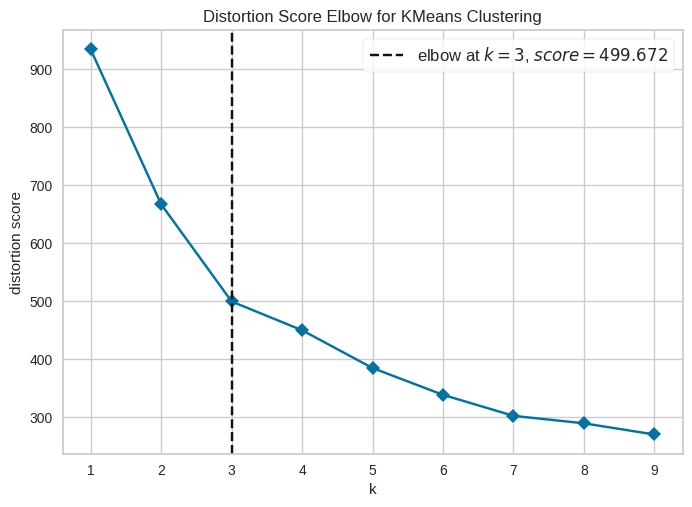

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

X = df

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10), timings=False)

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
visualizer.show()
plt.show()

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df = df.copy()

X = df[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']]

# Inisialisasi dan latih model K-Means dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, df, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Ambil data untuk cluster saat ini
        cluster_data = X[df['Cluster'] == cluster_id]
        cluster_df = df[df['Cluster'] == cluster_id]

        # Hitung rata-rata setiap fitur numerik dalam cluster
        mean_values = cluster_data.mean()

        # Hitung modus 'CustomerOccupation'
        mode_occupation = cluster_df['CustomerOccupation'].mode()[0]

        print(f"\nCluster {cluster_id + 1}:")
        for feature, mean_value in mean_values.items():
            print(f"Rata-rata {feature}: {mean_value:.2f}")
        print(f"Modus CustomerOccupation: {mode_occupation}")

analyze_clusters(X, df, k=3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionDuration: 0.39
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.10
Rata-rata CustomerAge: 0.13
Modus CustomerOccupation: 1.0

Cluster 2:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionDuration: 0.37
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.64
Rata-rata CustomerAge: 0.42
Modus CustomerOccupation: 0.0

Cluster 3:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionDuration: 0.37
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.30
Rata-rata CustomerAge: 0.71
Modus CustomerOccupation: 0.6666666666666666


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

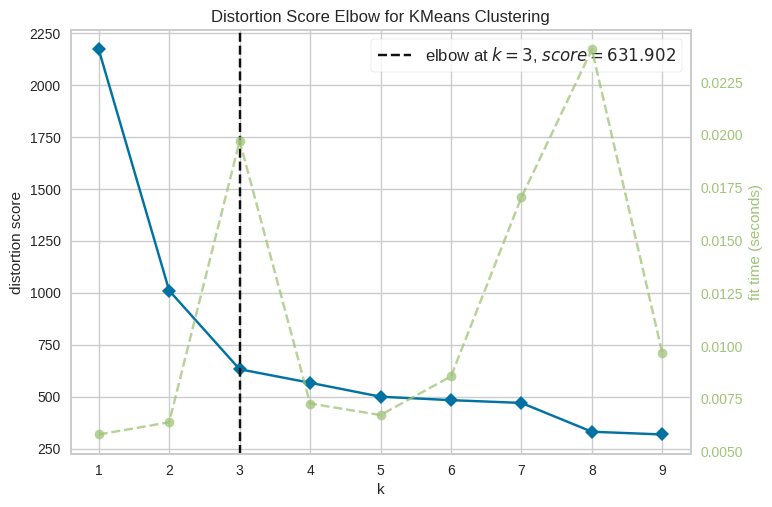

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd

X = df

kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10), timings=True)

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
visualizer.show()
plt.show()

In [20]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, df['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4535


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan label cluster
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting (misalnya, 10%)
threshold = 0.1
important_features = [X.columns[i] for i in indices if importances[i] >= threshold]

print("Fitur yang dipilih dengan Embedded Methods:")
for feature, importance in zip(important_features, importances[indices]):
    if importance >= threshold:
        print(f"{feature}: {importance:.4f}")

X_selected = df[important_features]

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_selected)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X_selected, labels)
print(f"\nSilhouette Score setelah feature selection: {silhouette_avg:.4f}")

Fitur yang dipilih dengan Embedded Methods:
AccountBalance: 0.3850
CustomerAge: 0.3332
CustomerOccupation: 0.2073

Silhouette Score setelah feature selection: 0.5184


Silhoutte Score yang Diperoleh

- Sebelum Feature Selection: 0.3047
- Setelah Feature Selection (Random Forest): 0.5184

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

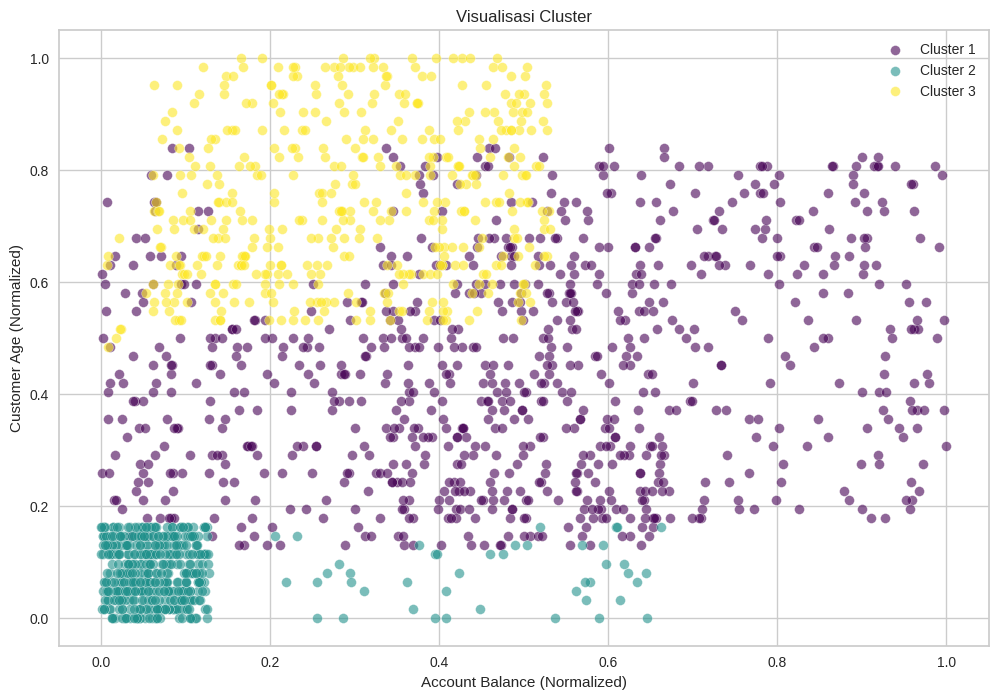

In [22]:
import matplotlib.pyplot as plt
import numpy as np

X_plot = df[['AccountBalance', 'CustomerAge']].values

labels = kmeans.labels_

unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Visualisasi scatter plot
plt.figure(figsize=(12, 8))

for label, color in zip(unique_labels, colors):
    cluster_points = X_plot[labels == label]  # Filter data per cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=color, label=f'Cluster {label+1}', alpha=0.6, edgecolors='w', s=50)

plt.title('Visualisasi Cluster')
plt.xlabel('Account Balance (Normalized)')
plt.ylabel('Customer Age (Normalized)')
plt.legend()
plt.grid(True)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [23]:
df

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0.007207,1.0,0.0,0.838710,0.000000,0.244828,0.0,0.336832,2
1,0.195940,1.0,0.0,0.806452,0.000000,0.451724,0.0,0.918055,1
2,0.065680,1.0,1.0,0.016129,1.000000,0.158621,0.0,0.068637,0
3,0.096016,1.0,1.0,0.129032,1.000000,0.051724,0.0,0.569198,1
5,0.047888,1.0,0.0,0.000000,1.000000,0.558621,0.0,0.045738,0
...,...,...,...,...,...,...,...,...,...
2505,0.300628,1.0,0.0,0.338710,0.333333,0.203448,0.0,0.347161,1
2506,0.047935,1.0,0.5,0.677419,0.333333,0.286207,0.0,0.459525,2
2508,0.130953,1.0,0.5,0.483871,0.000000,0.575862,0.0,0.010318,0
2509,0.014785,1.0,0.5,0.612903,0.666667,0.468966,0.0,0.220590,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [24]:
df[['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',	'CustomerOccupation',	'TransactionDuration', 'LoginAttempts',	'AccountBalance']] = scaler.inverse_transform(df[['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',	'CustomerOccupation',	'TransactionDuration', 'LoginAttempts',	'AccountBalance']])

In [25]:
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col].astype(int))

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
# Menghitung statistik (min, mean, max) untuk fitur numerik per cluster
df.groupby('Cluster').agg({
    'AccountBalance': ['min', 'mean', 'max'],
    'TransactionAmount': ['min', 'mean', 'max'],
    'CustomerAge': ['min', 'mean', 'max']
})

AccountBalance                        TransactionAmount              \
                   min         mean       max               min        mean   
Cluster                                                                       
0               101.25  1613.975118   6847.47              0.26  253.674544   
1              5244.49  9664.652152  14977.99              0.32  250.233581   
2               120.89  4546.420155  10017.11              0.84  247.477883   

                CustomerAge                   
            max         min       mean   max  
Cluster                                       
0        889.01        18.0  25.917230  48.0  
1        903.19        18.0  43.731429  69.0  
2        888.57        42.0  61.723338  80.0

<Figure size 1000x600 with 0 Axes>

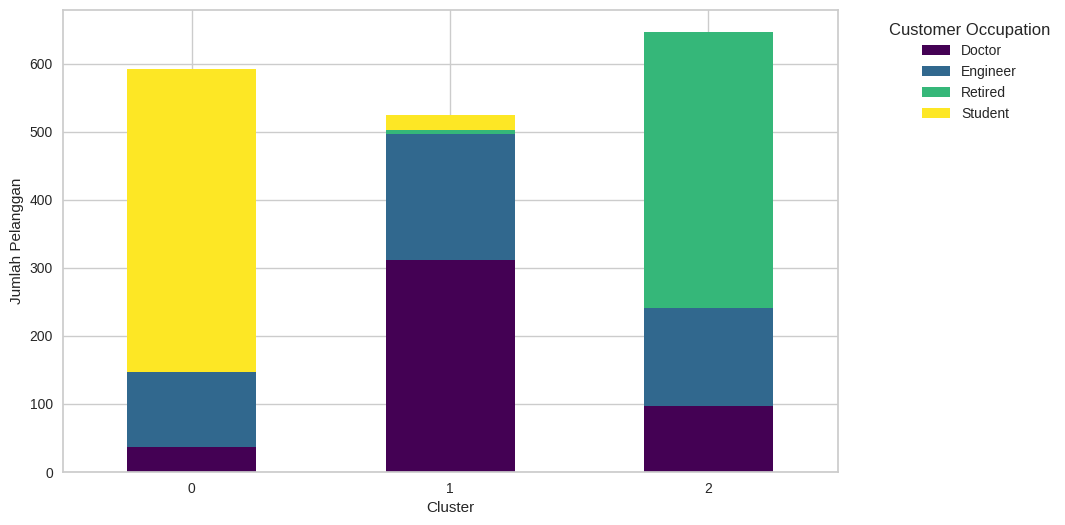

In [27]:
# Hitung distribusi CustomerOccupation per Cluster
occupation_counts = df.groupby(["Cluster", "CustomerOccupation"]).size().unstack()

plt.figure(figsize=(10, 6))
occupation_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))

plt.xlabel("Cluster")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Customer Occupation", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

In [28]:
df.groupby("Cluster")["CustomerOccupation"].value_counts().unstack().fillna(0)

CustomerOccupation,Doctor,Engineer,Retired,Student
Cluster,,,,
0,36.0,111.0,0.0,445.0
1,311.0,185.0,6.0,23.0
2,97.0,144.0,406.0,0.0


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
1. Account Balance:
  - Berdasarkan tabel, account balance cluster 1 cenderung memiliki rata-rata saldo paling rendah dengan 1613.97, serta batas minimum dan maksimum paling rendah, 101.25 dan 6847.7
  - Menunjukkan bahwa pengguna dalam cluster 1 memiliki pendapatan yang terbatas.
2. Transaction Amount:
  - Berdasarkan tabel, transaction amount cluster 1 cenderung memiliki rata-rata paling rendah dengan 253.67, batas minimum terendah dengan 0.26, dan batas maksimum menengah dengan, 889.01
  - Menunjukkan bahwa pengguna dalam cluster 1 memiliki cenderung membutuhkan keperluan perhari yang lebih tinggi, hingga rata-rata yang melebihi kedua cluster lain.
3. Customer Age:
  - Berdasarkan tabel, customer age cluster 1 cenderung memiliki rata-rata paling rendah dengan 25.9, serta batas minimum dan maksimum yang paling rendah dengan 18.0 dan 48.0
  - Hal ini menunjukkan bahwa mayoritas cluster 1 termasuk usia muda, yang lebih membutuhkan bantuan finansial dari orang tua mereka.
4. Customer Occupation:
  - Berdasarkan grafik dan tabel, occupation yang dominan pada cluster 1 adalah student, atau pelajar dengan jumlah 455, diikuti engineer dengan jumlah 111.
  - Hal ini menunjukkan bahwa mayoritas cluster 1 masih di sekolah, mendoring naratif sebelumnya dimana rata-rata customer age yang paling rendah dibandingkan cluster 2 dan 3.

## Cluster 2:
1. Account Balance:
  - Berdasarkan tabel, account balance cluster 2 memiliki rata-rata, batas minimum, dan batas maksimum saldo paling tinggi dengan 9664.65, 5244.49, dan 14977.99
  - Menunjukkan bahwa cluster 2 memiliki pendapatan yang yang stabil, dibandingkan dengan cluster 1.  
2. Rata-rata Transaction Amount:
  - Berdasarkan tabel, transaction amount cluster 2 memiliki rata-rata dan batas minimum menengah dengan 250.23 dan 0.32, namun batas maksimum paling tinggi dengan 903.13
  - Batas maksimum yang paling tinggi dapat menunjukkan keperluan darurat yang lebih tinggi dibanding dengan yang lain.
3. Customer Age:
  - Rata-rata dan batas maksimum customer age cluster 2 menengah dengan 43.7 dan 69.0, sedagkan batas minimum yang menyerupai cluster 1 dengan 18.0.
  - Hal ini menunjukkan bahwa rentang usia cluster 2 luas, namun lebih cenderung pada usia 40-an, menandakan anggota cluster adalah professional yang bekerja.
4. Customer Occupation:
  - Berdasarkan grafik dan tabel, occupation yang dominan adalah doctor dengan jumlah 311 anggota, diikuti 185 engineer.
  - Dengan sebagian besar anggota cluster bekerja, menguatkan analisis sebelumnya yang cenderung mendorong cluster 2 sebagai professional paruh baya yang sudah mapan.

## Cluster 3:
1. Account Balance:
  - Berdasarkan tabel, cluster 3 memiliki rata-rata, batas minimum, dan batas maksimum saldo yang menengah, dengan 4546.42, 120.89	4546.42, dan 10017.11.
  - Hal ini menunjukkan bahwa cluster 3 memiliki pendapatan yang komparabel dengan cluster 2, namun dengan batas minimum rendah, memungkinkan untuk bantuan finansial.
2. Transaction Amount: 247.47
  - Berdasarkan tabel, transaction amount cluster 3 memiliki rata-rata dan batas maksimum terendah dengan 247.47 dan 888.57, namun batas minimum paling tinggi dengan 0.84
  - Menunjukkan kebutuhan berbelanja yang kurang dibandingkan kedua cluster sebelumnya.
3. Customer Age: 61.7
  - Ketiga rata-rata, batas minimum, dan batas maksimum customer age cluster 3 adalah yang paling tinggi dengan 61.77, 42.0, dan 80.0
  - Hal ini menunjukkan bahwa rentang usia cluster 3 lebih mencakup usia lanjut, yang cenderung sudah usia pensiun.
4. Customer Occupation: Retired
  - Berdasarkan grafik dan tabel, occupation yang dominan adalah retired dengan jumlah 406 anggota, diikuti engineer dengan 144.
  - Hal ini menunjukkan bahwa mayoritas anggota cluster 3 sudah pensiun, atau professional yang mendekati masa pensiun mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [29]:
df.to_csv('hasil_clustering.csv', index=False)